In [2]:
from xml.dom import minidom
import numpy as np
import xml.etree.ElementTree as ET
from lxml import etree
from numpy import random
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
mydoc=minidom.parse('grid.rou.xml')

In [ ]:
np.shape(mydoc[0])

In [ ]:
items = mydoc.getElementsByTagName('route')

In [ ]:
items

In [ ]:
print('Item #2 attribute:')

In [ ]:
v=(items[1].attributes['edges'].value)

In [ ]:
print(v[0:4]+'_0')

In [ ]:
####trying  element tree

In [2]:
tree = ET.parse('grid.rou.xml')
root = tree.getroot()

In [3]:
root.tag

'routes'

In [4]:
root.attrib

{'{http://www.w3.org/2001/XMLSchema-instance}noNamespaceSchemaLocation': 'http://sumo.dlr.de/xsd/routes_file.xsd'}

In [ ]:
for child in root:
    print(child.tag, child.attrib)

In [ ]:
for vehicle in root.iter('vehicle'):
    print(vehicle.attrib)

In [ ]:
#ET.dump(tree)

In [ ]:
#########actual one to create new routes!

In [163]:
tree = ET.parse('grid.rou.xml')
root = tree.getroot()

In [164]:
c=0
a=''
for x in root.iter():
    
    #if (c<200):
        if (x.tag == 'route'):
            #print(x.attrib)
            s=str(x.attrib)
            a+=s[11:15]
            #print(s[11:15])


In [165]:
c=0
for x in root.iter():
    
    if (c<100):
        if (x.tag == 'vehicle'):
            s=str(x.attrib)
            lane=np.int(np.random.uniform(low=0,high=3))
            pos=np.int(np.random.uniform(low=10,high=170))
            ET.SubElement(x, 'stop lane='+'"'+a[c*4:c*4+4] +'_'+str(lane)+'"' +' endPos="'+str(pos)+'" until="5000"')
            c=c+1
    

In [166]:
tree.write("grid.rou_s100_r5000.xml")


In [ ]:
#no new cars after 1000s (when hack occurs)
#followed by recovery after 2000 (1000-3000)s

In [15]:
tree = ET.parse('grid.rou.xml')
root = tree.getroot()
c=0
a=''
for x in root.iter():
    
    #if (c<200):
        if (x.tag == 'route'):
            #print(x.attrib)
            s=str(x.attrib)
            a+=s[11:15]
            #print(s[11:15])

c=0
for x in root.iter():
    
    if (x.tag == 'vehicle'):
        s=str(x.attrib)
        lane=np.int(np.random.uniform(low=0,high=3))
        pos=np.int(np.random.uniform(low=10,high=170))
        if ((c>1000) and (c<2000)):
            ET.SubElement(x, 'stop lane='+'"'+a[c*4:c*4+4] +'_'+str(lane)+'"' +' endPos="'+str(pos)+'" until="4000"')
        c=c+1
tree.write("grid.rou_s1000_r4000.xml")
            

In [ ]:
#now trying to read outputs!

In [24]:
tree = ET.parse('aggregated_s1000_r4000.xml')
root = tree.getroot()

In [42]:
#for child in root:
#    print(child.tag, child.attrib)

In [25]:
c=0
a=''
speeds=np.zeros(1600)

for x in root.iter():    
    if (x.tag == 'edge'):
        a= (x.attrib)
        if(c<1600):
            speeds[c]=np.float(a['speed'])
            c=c+1
            
            

In [26]:
c

1600

In [27]:
speeds_seg1000=np.zeros([80,20])
for i in range(0,20):
    speeds_seg1000[:,i]=speeds[i*80:(i+1)*80]


In [23]:
speeds_seg1000nnr=speeds_seg1000

In [154]:
10000/500*80

1600.0

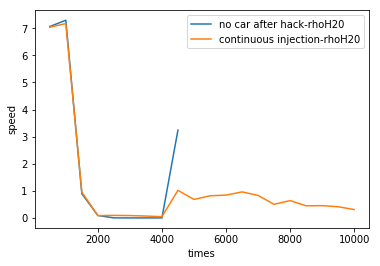

In [32]:
fig=plt.figure()
times=np.linspace(500,10000,20)
l1,=plt.plot(times[:9],np.mean(speeds_seg1000nnr[:,:9],axis=0),label='no car after hack-rhoH20')
l1,=plt.plot(times[:],np.mean(speeds_seg1000[:,:],axis=0),label='continuous injection-rhoH20')

plt.xlabel('times')
plt.ylabel('speed')
plt.legend()
plt.savefig('recovery.png')

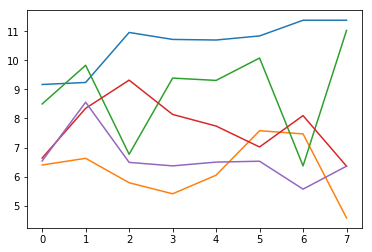

In [70]:
for i in range(0,5):
    plt.plot(speeds_seg[i,:])

In [73]:
meanvel=np.mean(speeds_seg,axis=1)
meanvel

array([10.54875,  6.23875,  8.91   ,  7.70875,  6.615  ,  7.2425 ,
        7.8125 ,  6.28875,  7.0175 ,  7.74875,  5.98   ,  7.17   ,
        9.355  ,  8.71   ,  7.51375,  7.625  ,  7.045  ,  6.6525 ,
        5.82375,  5.8975 ,  6.46375,  6.36125,  5.88125,  5.56875,
        6.94375,  5.6925 ,  6.97625,  6.09125,  8.77   ,  6.1825 ,
        8.94375,  8.6925 ,  6.49875,  8.39875,  6.205  ,  7.155  ,
        5.65375,  6.49125,  5.82625,  5.83   ,  6.04875,  6.095  ,
        6.81125,  5.42625,  7.115  ,  6.1975 ,  8.77375,  6.81   ,
        8.59375,  7.835  ,  6.38   ,  9.445  ,  5.96375,  6.50375,
        5.625  ,  7.27875,  5.4    ,  5.76   ,  6.91875,  6.495  ,
        5.8475 ,  5.58625,  7.175  ,  6.9475 ,  7.805  ,  7.455  ,
        7.95875, 10.23625,  8.0775 ,  6.62875,  8.335  ,  8.4    ,
        6.96875,  7.21625,  7.9625 ,  6.595  ,  7.67875,  8.67625,
        6.13125, 10.08125])

In [75]:
np.mean(meanvel)

7.122109374999999

In [141]:
redvel_100=speeds_seg100[:,7]/speeds_seg[:,7]

In [178]:
np.mean(np.mean(speeds_seg10,axis=1)/np.mean(speeds_seg,axis=1))

0.9758518065906866

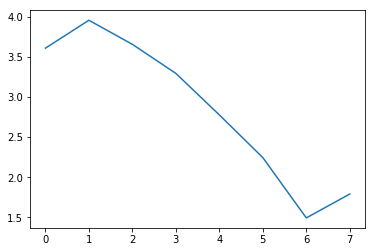

In [149]:
a1=speeds_seg100/speeds_seg
plt.plot(np.mean(speeds_seg100,axis=0))

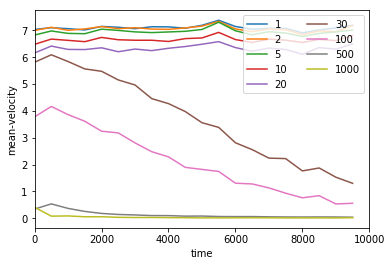

In [175]:
l1,=plt.plot(time,np.mean(speeds_seg1,axis=0),label='1')
l2,=plt.plot(time,np.mean(speeds_seg2,axis=0),label='2')
l5,=plt.plot(time,np.mean(speeds_seg5,axis=0),label='5')
l10,=plt.plot(time,np.mean(speeds_seg10,axis=0),label='10')
l20,=plt.plot(time,np.mean(speeds_seg20,axis=0),label='20')
l30,=plt.plot(time,np.mean(speeds_seg30,axis=0),label='30')
l100,=plt.plot(time,np.mean(speeds_seg100,axis=0),label='100')
l500,=plt.plot(time,np.mean(speeds_seg500,axis=0),label='500')
l1000,=plt.plot(time,np.mean(speeds_seg1000,axis=0),label='1000')
plt.legend(loc='upper right',ncol=2)
plt.xlabel('time')
plt.ylabel('mean-velocity')
plt.xlim(0,10000)
plt.savefig('Velocity-posthack-teleport.png')

In [45]:
speeds_seg1_m=np.mean(speeds_seg1,axis=0)
speeds_seg2_m=np.mean(speeds_seg2,axis=0)
speeds_seg5_m=np.mean(speeds_seg5,axis=0)
speeds_seg10_m=np.mean(speeds_seg10,axis=0)
speeds_seg20_m=np.mean(speeds_seg20,axis=0)
speeds_seg30_m=np.mean(speeds_seg30,axis=0)
speeds_seg100_m=np.mean(speeds_seg100,axis=0)
speeds_seg500_m=np.mean(speeds_seg500,axis=0)
speeds_seg1000_m=np.mean(speeds_seg1000,axis=0)
v_t1000=np.array([speeds_seg1_m[2],speeds_seg2_m[2],speeds_seg5_m[2],speeds_seg10_m[2],speeds_seg20_m[2],speeds_seg30_m[2],speeds_seg100_m[2],speeds_seg500_m[2],speeds_seg1000_m[2]])
v_t2000=np.array([speeds_seg1_m[4],speeds_seg2_m[4],speeds_seg5_m[4],speeds_seg10_m[4],speeds_seg20_m[4],speeds_seg30_m[4],speeds_seg100_m[4],speeds_seg500_m[4],speeds_seg1000_m[4]])
v_t3000=np.array([speeds_seg1_m[6],speeds_seg2_m[6],speeds_seg5_m[6],speeds_seg10_m[6],speeds_seg20_m[6],speeds_seg30_m[6],speeds_seg100_m[6],speeds_seg500_m[6],speeds_seg1000_m[6]])
v_t4000=np.array([speeds_seg1_m[8],speeds_seg2_m[8],speeds_seg5_m[8],speeds_seg10_m[8],speeds_seg20_m[8],speeds_seg30_m[8],speeds_seg100_m[8],speeds_seg500_m[8],speeds_seg1000_m[8]])
v_t5000=np.array([speeds_seg1_m[10],speeds_seg2_m[0],speeds_seg5_m[10],speeds_seg10_m[10],speeds_seg20_m[10],speeds_seg30_m[10],speeds_seg100_m[10],speeds_seg500_m[10],speeds_seg1000_m[10]])

In [46]:
dens=np.array([1,2,5,10,20,30,100,500,1000])
dens=dens*5/(40*2*3)

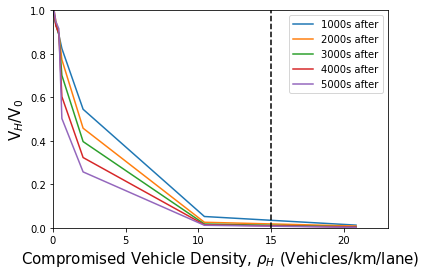

In [53]:
fig=plt.figure()
l1,=plt.plot(dens,v_t1000/np.mean(speeds_seg),label="1000s after")
#plt.plot(dens,v_t1000,'b.')
l2,=plt.plot(dens,v_t2000/np.mean(speeds_seg),label="2000s after")
l3,=plt.plot(dens,v_t3000/np.mean(speeds_seg),label="3000s after")
l4,=plt.plot(dens,v_t4000/np.mean(speeds_seg),label="4000s after")
l5,=plt.plot(dens,v_t5000/np.mean(speeds_seg),label="5000s after")
plt.ylabel(r'V$_{H}$/V$_0$',size=15);
plt.xlabel(r'Compromised Vehicle Density, $\rho_H$ (Vehicles/km/lane)', size=15);
plt.legend(loc='best')
plt.plot(np.linspace(15,15,10),np.linspace(0,1.2,10),'k--')
plt.xlim(0,23)
plt.ylim(0,1)
plt.savefig('Velocity-posthack-density.pdf')



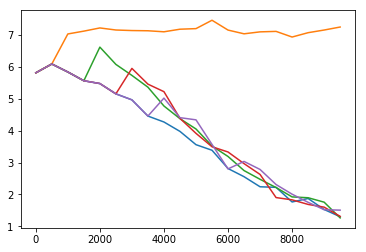

In [265]:
l30,=plt.plot(time,np.mean(speeds_seg30,axis=0),label='30')
l30_1000,=plt.plot(time,np.mean(speeds_seg30_r1000,axis=0),label='30_recovery 1000s')
l30_2000,=plt.plot(time,np.mean(speeds_seg30_r2000,axis=0),label='30_recovery 2000s')
l30_3000,=plt.plot(time,np.mean(speeds_seg30_r3000,axis=0),label='30_recovery 3000s')
l30_4000,=plt.plot(time,np.mean(speeds_seg30_r4000,axis=0),label='30_recovery 4000s')
#l30_5000,=plt.plot(time,np.mean(speeds_seg30_r5000,axis=0),label='30_recovery 5000s')


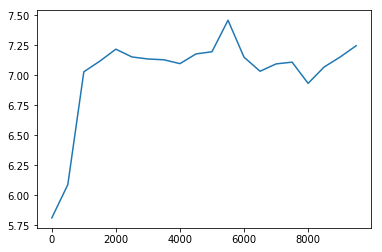

In [266]:
l30_1000,=plt.plot(time,np.mean(speeds_seg30_r1000,axis=0),label='30_recovery 1000s')
